In [1]:
!pip install transformers

     |████████████████████████████████| 368kB 10.7MB/s eta 0:00:01
     |████████████████████████████████| 675kB 15.8MB/s eta 0:00:01
     |████████████████████████████████| 860kB 20.7MB/s eta 0:00:01
     |████████████████████████████████| 1.0MB 22.7MB/s eta 0:00:01
  Created wheel for regex: filename=regex-2019.12.9-cp36-cp36m-linux_x86_64.whl size=608292 sha256=b447971564656c6a3f9eaeead0c7a50d697e9644e032cceba853185345fb7564
  Stored in directory: /home/azureuser/.cache/pip/wheels/0d/fb/b3/a89169557229468c49ca64f6839418f22461f6ee0a74f342b1
  Created wheel for sacremoses: filename=sacremoses-0.0.35-cp36-none-any.whl size=883999 sha256=e996fb68496aed0d7bffdb9a3eb9a5be06b4f403f8d75f41e248a8d61fa6d058
  Stored in directory: /home/azureuser/.cache/pip/wheels/63/2a/db/63e2909042c634ef551d0d9ac825b2b0b32dede4a6d87ddc94
Successfully built regex sacremoses


In [2]:
!pip install kaggle

     |████████████████████████████████| 61kB 10.4MB/s eta 0:00:01
     |████████████████████████████████| 81kB 23.5MB/s eta 0:00:01
  Created wheel for kaggle: filename=kaggle-1.5.6-cp36-none-any.whl size=72859 sha256=16d7e2fb0608f32b23ea61d8eab91c5d5ed2839fe9cf9f6e9d81afcafd7a4a35
  Stored in directory: /home/azureuser/.cache/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674
  Created wheel for python-slugify: filename=python_slugify-4.0.0-py2.py3-none-any.whl size=5487 sha256=9ef18ae270c8063cf606bf50d90d10c538ab27b749a76c5c27b2446b1d9e5bbb
  Stored in directory: /home/azureuser/.cache/pip/wheels/11/94/81/312969455540cb0e6a773e5d68a73c14128bfdfd4a7969bb4f
Successfully built kaggle python-slugify


In [15]:
!pip install fastai

     |████████████████████████████████| 3.5MB 24.5MB/s eta 0:00:01
     |████████████████████████████████| 10.4MB 34.0MB/s eta 0:00:01
     |████████████████████████████████| 122kB 41.8MB/s eta 0:00:01
     |████████████████████████████████| 2.2MB 32.1MB/s eta 0:00:01
     |████████████████████████████████| 3.7MB 42.0MB/s eta 0:00:01
     |████████████████████████████████| 194kB 62.6MB/s eta 0:00:01
  Created wheel for fastai: filename=fastai-1.0.59-cp36-none-any.whl size=235956 sha256=42a9c321dd81c014b7fcb5124718f6ac5d901b21840a26c5d7bd9bf96040734b
  Stored in directory: /home/azureuser/.cache/pip/wheels/45/3e/33/2286dfb90e4d3e197356552c0743678bb158d47f6e05540029
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-cp36-none-any.whl size=19192 sha256=a579072d01cbe4be3262cc38d5580a5843b81274911477bfb80f63cf81896202
  Stored in directory: /home/azureuser/.cache/pip/wheels/e4/1d/06/640c93f5270d67d0247f30be91f232700d19023f9e66d735c7
Successfully built fastai nvidia-ml-py3


In [1]:
import time
from platform import python_version
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import transformers
from sklearn.metrics import roc_auc_score
from torch.autograd import Variable

In [8]:
!cp kaggle.json /home/azureuser/.kaggle

In [9]:
!kaggle competitions download -c jigsaw-toxic-comment-classification-challenge

 77%|█████████████████████████████▉         | 41.0M/53.4M [00:00<00:00, 107MB/s]
100%|██████████████████████████████████████| 53.4M/53.4M [00:01<00:00, 36.8MB/s]


In [10]:
!unzip train.csv.zip

unzip:  cannot find or open train.csv.zip, train.csv.zip.zip or train.csv.zip.ZIP.


In [ ]:
!unzip jigsaw-toxic-comment-classification-challenge.zip

# Reading data and create train, valid , test set

In [2]:
df = pd.read_csv('train.csv')

In [3]:
np.random.seed(42)
df = df.sample(frac=1)
df = df.reset_index(drop=True)

In [4]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,7ca72b5b9c688e9e,"Geez, are you forgetful! We've already discus...",0,0,0,0,0,0
1,c03f72fd8f8bf54f,Carioca RFA \n\nThanks for your support on my ...,0,0,0,0,0,0
2,9e5b8e8fc1ff2e84,"""\n\n Birthday \n\nNo worries, It's what I do ...",0,0,0,0,0,0
3,5332799e706665a6,Pseudoscience category? \n\nI'm assuming that ...,0,0,0,0,0,0
4,dfa7d8f0b4366680,"(and if such phrase exists, it would be provid...",0,0,0,0,0,0


In [5]:
target_columns = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
df.iloc[[103]][target_columns]

,toxic,severe_toxic,obscene,threat,insult,identity_hate
103,1,1,1,0,1,0


In [6]:
df_train = df[:10000].reset_index(drop=True)
df_val = df[10000:11000].reset_index(drop=True)
df_test = df[11000:13000].reset_index(drop=True)

# Loading BERT

In [7]:
model_class = transformers.BertModel
tokenizer_class = transformers.BertTokenizer
pretrained_weights='bert-base-uncased'# Load pretrained model/tokenizer

tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
bert_model = model_class.from_pretrained(pretrained_weights)

In [8]:
max_seq = 100
def tokenize_text(df, max_seq):
    return [
        tokenizer.encode(text, add_special_tokens=True)[:max_seq] for text in df.comment_text.values
    ]
def pad_text(tokenized_text, max_seq):
    return np.array([el + [0] * (max_seq - len(el)) for el in tokenized_text])
def tokenize_and_pad_text(df, max_seq):
    tokenized_text = tokenize_text(df, max_seq)
    padded_text = pad_text(tokenized_text, max_seq)
    return torch.tensor(padded_text)
def targets_to_tensor(df, target_columns):
    return torch.tensor(df[target_columns].values, dtype=torch.float32)

In [9]:
train_indices = tokenize_and_pad_text(df_train, max_seq)
val_indices = tokenize_and_pad_text(df_val, max_seq)
test_indices = tokenize_and_pad_text(df_test, max_seq)

with torch.no_grad():
    x_train = bert_model(train_indices)[0]  
    x_val = bert_model(val_indices)[0]
    x_test = bert_model(test_indices)[0]


y_train = targets_to_tensor(df_train, target_columns)
y_val = targets_to_tensor(df_val, target_columns)
y_test = targets_to_tensor(df_test, target_columns)

WARNING - Token indices sequence length is longer than the specified maximum sequence length for this model (797 > 512). Running this sequence through the model will result in indexing errors
WARNING - Token indices sequence length is longer than the specified maximum sequence length for this model (574 > 512). Running this sequence through the model will result in indexing errors
WARNING - Token indices sequence length is longer than the specified maximum sequence length for this model (761 > 512). Running this sequence through the model will result in indexing errors
WARNING - Token indices sequence length is longer than the specified maximum sequence length for this model (645 > 512). Running this sequence through the model will result in indexing errors
WARNING - Token indices sequence length is longer than the specified maximum sequence length for this model (814 > 512). Running this sequence through the model will result in indexing errors
WARNING - Token indices sequence length 

In [11]:
class KimCNN(nn.Module):
    def __init__(self, embed_num, embed_dim, class_num, kernel_num, kernel_sizes, dropout, static):
        
        super(KimCNN, self).__init__()        
        V = embed_num
        D = embed_dim
        C = class_num
        Co = kernel_num
        Ks = kernel_sizes
        
        self.static = static
        self.embed = nn.Embedding(V, D)
        self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, (K, D)) for K in Ks])
        
        self.dropout = nn.Dropout(dropout)
        self.fc1 = nn.Linear(len(Ks) * Co, C)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        if self.static:
            x = Variable(x)   
            
        x = x.unsqueeze(1)  # (N, Ci, W, D)        
        x = [F.relu(conv(x)).squeeze(3) for conv in self.convs1]  # [(N, Co, W), ...]*len(Ks)       
        x = [F.max_pool1d(i, i.size(2)).squeeze(2) for i in x]  # [(N, Co), ...]*len(Ks)        
        x = torch.cat(x, 1)
            
        x = self.dropout(x)  # (N, len(Ks)*Co)
        logit = self.fc1(x)  # (N, C)
        output = self.sigmoid(logit)
        return output

# Load trained model

In [12]:
model = torch.load('modelFullPerfect.pth')

# Training

In [46]:
embed_num = x_train.shape[1]
embed_dim = x_train.shape[2]
class_num = y_train.shape[1]
kernel_num = 3
kernel_sizes = [2, 3, 4]
dropout = 0.5
static = True

model = KimCNN(
    embed_num=embed_num,
    embed_dim=embed_dim,
    class_num=class_num,
    kernel_num=kernel_num,
    kernel_sizes=kernel_sizes,
    dropout=dropout,
    static=static
)
  

In [23]:
n_epochs = 10
batch_size = 10
lr = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
loss_fn = nn.BCELoss()

In [21]:
def generate_batch_data(x, y, batch_size):
    i, batch = 0, 0
    for batch, i in enumerate(range(0, len(x) - batch_size, batch_size), 1):
        x_batch = x[i : i + batch_size]
        y_batch = y[i : i + batch_size]
        yield x_batch, y_batch, batch
    if i + batch_size < len(x):
        yield x[i + batch_size :], y[i + batch_size :], batch + 1
    if batch == 0:
        yield x, y, 1

In [49]:
train_losses, val_losses = [], []

for epoch in range(n_epochs):
    start_time = time.time()
    train_loss = 0   
    
    model.train(True)
    
    for x_batch, y_batch, batch in generate_batch_data(x_train, y_train, batch_size):
        y_pred = model(x_batch)
        optimizer.zero_grad()
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    train_loss /= batch
    train_losses.append(train_loss)
    elapsed = time.time() - start_time

    model.eval() # disable dropout for deterministic output
# deactivate autograd engine to reduce memory usage and speed up computations

    with torch.no_grad():
        val_loss, batch = 0, 1

        for x_batch, y_batch, batch in generate_batch_data(x_val, y_val, batch_size):
            y_pred = model(x_batch)
            loss = loss_fn(y_pred, y_batch)
            val_loss += loss.item()

        val_loss /= batch
        val_losses.append(val_loss)    
    
    print(
        "Epoch %d Train loss: %.2f. Validation loss: %.2f. Elapsed time: %.2fs."
        % (epoch + 1, train_losses[-1], val_losses[-1], elapsed)
    )

Epoch 1 Train loss: 0.18. Validation loss: 0.09. Elapsed time: 16.68s.
Epoch 2 Train loss: 0.11. Validation loss: 0.09. Elapsed time: 16.36s.
Epoch 3 Train loss: 0.10. Validation loss: 0.08. Elapsed time: 16.20s.
Epoch 4 Train loss: 0.10. Validation loss: 0.08. Elapsed time: 16.46s.
Epoch 5 Train loss: 0.09. Validation loss: 0.07. Elapsed time: 16.46s.
Epoch 6 Train loss: 0.08. Validation loss: 0.06. Elapsed time: 16.71s.
Epoch 7 Train loss: 0.08. Validation loss: 0.06. Elapsed time: 16.60s.
Epoch 8 Train loss: 0.08. Validation loss: 0.06. Elapsed time: 16.34s.
Epoch 9 Train loss: 0.07. Validation loss: 0.06. Elapsed time: 16.58s.
Epoch 10 Train loss: 0.07. Validation loss: 0.06. Elapsed time: 16.63s.


Text(0.5, 1.0, 'Losses')

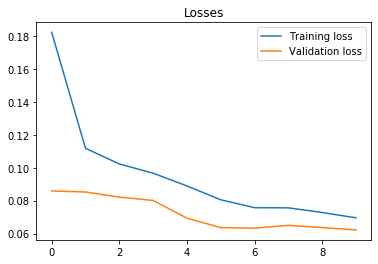

In [50]:
plt.plot(train_losses, label="Training loss")
plt.plot(val_losses, label="Validation loss")
plt.legend()
plt.title("Losses")

# Evaluation

In [24]:
model.eval() # disable dropout for deterministic output

with torch.no_grad(): # deactivate autograd engine to reduce memory usage and speed up computations
    y_preds = []
    batch = 0
    for x_batch, y_batch, batch in generate_batch_data(x_test, y_test, batch_size):
        y_pred = model(x_batch)
        y_preds.extend(y_pred.cpu().numpy().tolist())
    y_preds_np = np.array(y_preds)

In [25]:
y_preds_np

array([[4.001829e-05, 5.516882e-16, 1.346699e-06, 3.010653e-16, 4.295127e-07, 2.806820e-09],
       [4.209973e-02, 8.148314e-06, 9.320569e-03, 2.959704e-06, 8.465828e-03, 4.489167e-04],
       [7.182984e-04, 1.488052e-12, 5.755267e-05, 2.411508e-12, 2.279289e-05, 4.724144e-07],
       [4.687427e-05, 3.110515e-15, 1.217899e-06, 7.214059e-16, 4.803255e-07, 3.237588e-09],
       ...,
       [4.342586e-04, 1.027305e-12, 3.102590e-05, 6.189098e-13, 1.467893e-05, 3.014703e-07],
       [3.982232e-03, 1.863330e-09, 4.546963e-04, 9.714682e-10, 2.202663e-04, 9.563332e-06],
       [8.692367e-05, 6.399820e-15, 3.437168e-06, 5.022165e-15, 1.106194e-06, 1.272415e-08],
       [8.222843e-03, 3.297230e-08, 1.054609e-03, 1.434760e-08, 8.547234e-04, 2.918602e-05]])

In [42]:
from sklearn.metrics import confusion_matrix
conMat = confusion_matrix(y_true=y_test.argmax(axis=1), y_pred=y_preds_np.argmax(axis=1))

In [43]:
conMat

array([[  72,    0,    0,    0,    0,    0],
       [   1,    0,    0,    0,    0,    0],
       [  26,    0,    0,    0,    0,    0],
       [   2,    0,    0,    0,    0,    0],
       [  82,    0,    0,    0,    0,    0],
       [1817,    0,    0,    0,    0,    0]])

In [46]:
import seaborn as sn

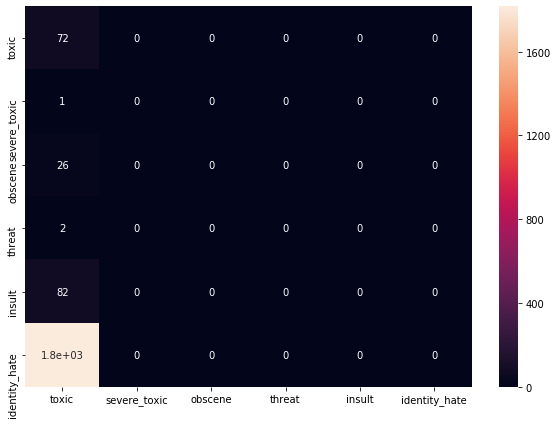

In [47]:
df_cm = pd.DataFrame(conMat, index = [i for i in target_columns],
                  columns = [i for i in target_columns])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [52]:
y_test_np = df_test[target_columns].values

y_test_np[1000:]

array([[1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [53]:
auc_scores = roc_auc_score(y_test_np, y_preds_np, average=None)
df_accuracy = pd.DataFrame({"label": target_columns, "auc": auc_scores})
df_accuracy.sort_values('auc')[::-1]

,label,auc
1,severe_toxic,0.966242
0,toxic,0.957392
4,insult,0.956408
2,obscene,0.941863
3,threat,0.932632
5,identity_hate,0.930836


In [54]:
positive_labels = df_train[target_columns].sum().sum()
positive_labels

2201

In [55]:
all_labels = df_train[target_columns].count().sum()
all_labels

60000

In [56]:
positive_labels/all_labels

0.03668333333333333

In [57]:
df_test_targets = df_test[target_columns]
df_pred_targets = pd.DataFrame(y_preds_np.round(), columns=target_columns, dtype=int)
df_sanity = df_test_targets.join(df_pred_targets, how='inner', rsuffix='_pred')

In [58]:
df_test_targets.sum()

toxic            186
severe_toxic      17
obscene           98
threat             5
insult            96
identity_hate     18
dtype: int64

In [59]:
df_pred_targets.sum()

toxic            121
severe_toxic       0
obscene           60
threat             0
insult            42
identity_hate      0
dtype: int64

In [60]:
l = df_sanity[df_sanity.toxic > 0][['toxic', 'toxic_pred']]

In [61]:
l.loc[l['toxic_pred'] == 1]

,toxic,toxic_pred
45,1,1
53,1,1
78,1,1
82,1,1
85,1,1
135,1,1
139,1,1
161,1,1
191,1,1
203,1,1


# Save model

In [63]:
torch.save(model.state_dict(), './modelPerfect.pth')

In [64]:
import dill as dill

In [118]:
torch.save(model, 'modelFullPerfect.pth')

In [11]:
model = torch.load('modelFull.pth')

In [105]:
def tokenize_single_text(text, max_seq):
    return [
        tokenizer.encode(text, add_special_tokens=True)[:max_seq] 
    ]

In [106]:
def pad_text(tokenized_text, max_seq):
    return np.array([el + [0] * (max_seq - len(el)) for el in tokenized_text])

In [107]:
def tokenize_and_pad_single_text(text, max_seq):
    tokenized_text = tokenize_single_text(text, max_seq)
    padded_text = pad_text(tokenized_text, max_seq)
    return torch.tensor(padded_text)

def targets_to_tensor(df, target_columns):
    return torch.tensor(df[target_columns].values, dtype=torch.float32)

In [114]:
mom_indices = tokenize_and_pad_single_text("Kamil is a stupid ass hoe", 100)

In [115]:
with torch.no_grad():
    x_mom = bert_model(mom_indices)[0]  

In [116]:
y_mom = targets_to_tensor(df_train, target_columns)

In [117]:
model(x_mom)

tensor([[0.9855, 0.1222, 0.8240, 0.0261, 0.6593, 0.1074]],
       grad_fn=<SigmoidBackward>)

In [113]:
!ls

BERT2.ipynb					   models
jigsaw-toxic-comment-classification-challenge.zip  modelSaved.pth
kaggle.json					   sample_submission.csv
model2.pth					   test.csv
modelFull.pth					   test_labels.csv
modelPerfect.pth				   train.csv
